# EDA and Clustering of Employee Dataset

## Exploratory data analysis

In [1]:
%matplotlib inline
import pandas as pd                                   #for data processing ; conda install pandas
import numpy as np                                    #for math            ; conda install numpy
import seaborn as sns                                 #for plotting        ; conda install seaborn
import matplotlib.pyplot as plt                       #for ploting         ; conda install matplotlib
from sklearn.preprocessing import MinMaxScaler        #for scaling         ; conda install -c conda-forge scikit-learn

In [2]:
data = pd.read_csv("/Users/mainak01/Desktop/CAPL/employees.csv")  #loading csv file according to my directory
data.head() #first 5 rows

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category
0,Ruchismita Dash,Amdocs,Software Developer,ruchidash89@gmail.com,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,8390909230,HYDERABAD-SALARIED
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,manisha.das82@gmail.com,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,9701900131,HYDERABAD-SALARIED
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,geethapriya89@gmail.com,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,9705407817,HYDERABAD-SALARIED
3,SRIKANTH,Axis Bank Ltd,NaN,sburisetty@gmail.com,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,8142444544,HYDERABAD-SALARIED
4,Madduri Srinivas,CTS,Associate Projects,madduri12@gmail.com,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,9581812128,HYDERABAD-SALARIED


In [3]:
data.tail()    #last 5 rows

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category
28842,Nadeem Haider,SOTC KUONI TRAVEL INDIA PVT LTD,Sr. Manager,nhaidar16@gmail.com,13 Year(s),Hyderabad/ Secunderabad,B.Sc. (Science),NaN,Rs. 10.09 lacs,9999345083,HYDERABAD-SALARIED
28843,Debabrata Karmakar,Ibm Global Services,Database Administrator,debabrata_kk@rediffmail.com,11 Year(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 7.0 lacs,9999623384,HYDERABAD-SALARIED
28844,Chirag Jain,Computer Sciences Corp Ltd ( csc ),associate professional,cjain.18@gmail.com,1 Year(s) 11 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 5.22 lacs,9999684333,HYDERABAD-SALARIED
28845,Kunal Sachdeva,Religare Enterprises,Business Analyst,kunalsachdeva1@gmail.com,5 Year(s) 8 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),12th & Not Pursuing Graduation,Rs. 5.05 lacs,9999777357,HYDERABAD-SALARIED
28846,Anuradha Sethi,Infosys,NaN,anuradhasethi12@gmail.com,4 Month(s),Hyderabad/ Secunderabad,NaN,M.Sc. (Science),Rs. 7.5 lacs,9999828573,HYDERABAD-SALARIED


In [4]:
data.shape      #no. of rows and columns

(28847, 11)

In [5]:
data.columns    #column names

Index(['candidateName', 'companyName', 'designation', 'emailAddress',
       'experienceMas', 'locationCurrentMas', 'qualificationMas',
       'qualificationMas2', 'salary', 'tel_Other', 'Category'],
      dtype='object')

In [6]:
data.nunique()   #no. of types of each columns

candidateName         27288
companyName           15153
designation           12636
emailAddress          28806
experienceMas           492
locationCurrentMas        3
qualificationMas         51
qualificationMas2        48
salary                 1560
tel_Other             28847
Category                  1
dtype: int64

In [7]:
data['designation'].unique()      #list of different designations

array(['Software Developer', 'SENIOR EXECUTIVE-OPERATIONS',
       'System Administrator', ..., '3d visualizer',
       'Sr. Associate / Team Lead', 'associate professional'],
      dtype=object)

In [8]:
#data cleaning

In [9]:
data.isnull().sum()  #checking null values

candidateName             4
companyName              41
designation            4630
emailAddress             12
experienceMas             0
locationCurrentMas        0
qualificationMas       4876
qualificationMas2     13398
salary                    0
tel_Other                 0
Category                  0
dtype: int64

In [10]:
# our main focus would be in experienceMas and salary. So no need to clean the data now, as there are no null values in both of them

In [11]:
# Lets convert experinceMas and salary in decimal values

In [12]:
data['SalaryInLacs'] = data.salary.str.split().str.get(1)      #segregating the salary numbers
data['ExpYear'] = data.experienceMas.str.split().str.get(0)      #segregating the year value
data['ExpMonth'] = data.experienceMas.str.split().str.get(2)     #segregating the month value
data.head()

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category,SalaryInLacs,ExpYear,ExpMonth
0,Ruchismita Dash,Amdocs,Software Developer,ruchidash89@gmail.com,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,8390909230,HYDERABAD-SALARIED,6.71,2,1
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,manisha.das82@gmail.com,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,9701900131,HYDERABAD-SALARIED,5.0,5,9
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,geethapriya89@gmail.com,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,9705407817,HYDERABAD-SALARIED,84.0,4,4
3,SRIKANTH,Axis Bank Ltd,NaN,sburisetty@gmail.com,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,8142444544,HYDERABAD-SALARIED,7.0,7,11
4,Madduri Srinivas,CTS,Associate Projects,madduri12@gmail.com,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,9581812128,HYDERABAD-SALARIED,8.05,6,8


In [13]:
data['ExpYear'].unique()     # checking the values. Replace the words with numbers

array(['2', '5', '4', '7', '6', '20', '11', '12', '13', '9', '10', '15',
       '3', '23', '19', '8', '17', '1', '22', '18', '24', '14', '26',
       '44', '16', '25', '30', '21', '29', '32', '36', '35', '33', '28',
       '42', '40', '38', '27', '31', '34', '37', '80', '41', '60',
       'Fresher', '50', '75', '43', '81', '39', '57', '45', '46', '85',
       '66', '52', '90', '63'], dtype=object)

In [14]:
data['ExpYear'] = data['ExpYear'].str.replace('Fresher','0')
data['ExpYear'].unique()    #okay it is replaced. But they are still strings. Lets check other columns.

array(['2', '5', '4', '7', '6', '20', '11', '12', '13', '9', '10', '15',
       '3', '23', '19', '8', '17', '1', '22', '18', '24', '14', '26',
       '44', '16', '25', '30', '21', '29', '32', '36', '35', '33', '28',
       '42', '40', '38', '27', '31', '34', '37', '80', '41', '60', '0',
       '50', '75', '43', '81', '39', '57', '45', '46', '85', '66', '52',
       '90', '63'], dtype=object)

In [15]:
data['ExpMonth'].unique()    #Replace nan with zero

array(['1', '9', '4', '11', '8', '2', nan, '6', '10', '7', '3', '5'],
      dtype=object)

In [16]:
data['ExpMonth'] = data['ExpMonth'].replace(np.nan,'0')
data['ExpMonth'].unique()   #nan is replaced. They are still strings.

array(['1', '9', '4', '11', '8', '2', '0', '6', '10', '7', '3', '5'],
      dtype=object)

In [17]:
data['SalaryInLacs'].unique()     #All are strings. We have to convert them in floating values

array(['6.71', '5.0', '84.0', ..., '15.74', '18.95', '11.92'],
      dtype=object)

In [18]:
data["ExpYear"] = data["ExpYear"].astype(float)
data["ExpMonth"] = data["ExpMonth"].astype(float)
data['SalaryInLacs'] = data['SalaryInLacs'].astype(float)
data.head()

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category,SalaryInLacs,ExpYear,ExpMonth
0,Ruchismita Dash,Amdocs,Software Developer,ruchidash89@gmail.com,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,8390909230,HYDERABAD-SALARIED,6.71,2.0,1.0
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,manisha.das82@gmail.com,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,9701900131,HYDERABAD-SALARIED,5.00,5.0,9.0
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,geethapriya89@gmail.com,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,9705407817,HYDERABAD-SALARIED,84.00,4.0,4.0
3,SRIKANTH,Axis Bank Ltd,NaN,sburisetty@gmail.com,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,8142444544,HYDERABAD-SALARIED,7.00,7.0,11.0
4,Madduri Srinivas,CTS,Associate Projects,madduri12@gmail.com,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,9581812128,HYDERABAD-SALARIED,8.05,6.0,8.0


In [19]:
data["TotalExpInMonths"] = data["ExpYear"]*12 + data["ExpMonth"]     #converting the candiadate experiences' in months
data = data.drop(["ExpYear","ExpMonth"], axis=1)             #Dropping them as they will not be used anymore

In [20]:
data.head()

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category,SalaryInLacs,TotalExpInMonths
0,Ruchismita Dash,Amdocs,Software Developer,ruchidash89@gmail.com,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,8390909230,HYDERABAD-SALARIED,6.71,25.0
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,manisha.das82@gmail.com,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,9701900131,HYDERABAD-SALARIED,5.00,69.0
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,geethapriya89@gmail.com,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,9705407817,HYDERABAD-SALARIED,84.00,52.0
3,SRIKANTH,Axis Bank Ltd,NaN,sburisetty@gmail.com,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,8142444544,HYDERABAD-SALARIED,7.00,95.0
4,Madduri Srinivas,CTS,Associate Projects,madduri12@gmail.com,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,9581812128,HYDERABAD-SALARIED,8.05,80.0


In [21]:
data_sorted = data.sort_values(by="SalaryInLacs",ascending = False)  #Descending the salaries
data_sorted.head()

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category,SalaryInLacs,TotalExpInMonths
18656,khaja moinuddin,NaN,NaN,khajamoinuddin1120@gmail.com,1 Year(s) 5 Month(s),Hyderabad/ Secunderabad,NaN,NaN,Rs. 14210.65 lacs,9885950891,HYDERABAD-SALARIED,14210.65,17.0
28276,kolaria mukesh,Luminova infotech LLC,IT Recruiter,kolariamukesh@gmail.com,5 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 960.0 lacs,9963283198,HYDERABAD-SALARIED,960.00,60.0
18909,Anil,formally known as Intelligroup Asia Pvt. Ltd,Hyderabad as oracle apps technical consultant,vaniloaf@gmail.com,7 Year(s),Hyderabad/ Secunderabad,MCA/ PGDCA,NaN,Rs. 950.0 lacs,8142423232,HYDERABAD-SALARIED,950.00,84.0
26272,Suman Kamarthapu,Munna united hospitality services,Restaurant manager,sumanworld007@gmail.com,5 Year(s) 5 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 903.0 lacs,9700551514,HYDERABAD-SALARIED,903.00,65.0
25921,MD RASHEED,Veljan Hydrair Ltd,vehicle mechanic,exarmymdrasheed@yahoo.in,19 Year(s) 3 Month(s),Hyderabad/ Secunderabad,Diploma-Other Diploma,NaN,Rs. 900.03 lacs,9618131433,HYDERABAD-SALARIED,900.03,231.0


In [22]:
#So we see the highest salary has a big difference with others and it has very less experience without mentioning any designation. 
#This data will not correlate with others and can mislead the results. So I will eliminate it.

In [23]:
data_new = data.drop(data.index[18656])    #deleting the data from 'data' dataframe
data_new.head()

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category,SalaryInLacs,TotalExpInMonths
0,Ruchismita Dash,Amdocs,Software Developer,ruchidash89@gmail.com,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,8390909230,HYDERABAD-SALARIED,6.71,25.0
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,manisha.das82@gmail.com,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,9701900131,HYDERABAD-SALARIED,5.00,69.0
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,geethapriya89@gmail.com,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,9705407817,HYDERABAD-SALARIED,84.00,52.0
3,SRIKANTH,Axis Bank Ltd,NaN,sburisetty@gmail.com,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,8142444544,HYDERABAD-SALARIED,7.00,95.0
4,Madduri Srinivas,CTS,Associate Projects,madduri12@gmail.com,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,9581812128,HYDERABAD-SALARIED,8.05,80.0


In [24]:
data_sorted_new = data_new.sort_values(by="SalaryInLacs",ascending = False)
data_sorted_new.head()          #just to check it is deleted or not. My new dataframe is "data_new"

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category,SalaryInLacs,TotalExpInMonths
28276,kolaria mukesh,Luminova infotech LLC,IT Recruiter,kolariamukesh@gmail.com,5 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 960.0 lacs,9963283198,HYDERABAD-SALARIED,960.00,60.0
18909,Anil,formally known as Intelligroup Asia Pvt. Ltd,Hyderabad as oracle apps technical consultant,vaniloaf@gmail.com,7 Year(s),Hyderabad/ Secunderabad,MCA/ PGDCA,NaN,Rs. 950.0 lacs,8142423232,HYDERABAD-SALARIED,950.00,84.0
26272,Suman Kamarthapu,Munna united hospitality services,Restaurant manager,sumanworld007@gmail.com,5 Year(s) 5 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 903.0 lacs,9700551514,HYDERABAD-SALARIED,903.00,65.0
25921,MD RASHEED,Veljan Hydrair Ltd,vehicle mechanic,exarmymdrasheed@yahoo.in,19 Year(s) 3 Month(s),Hyderabad/ Secunderabad,Diploma-Other Diploma,NaN,Rs. 900.03 lacs,9618131433,HYDERABAD-SALARIED,900.03,231.0
24005,sadanand s,hdb financial services ltd,Telecalling Officer,sadanand.manju@gmail.com,1 Year(s),Hyderabad/ Secunderabad,BCA (Computer Application),NaN,Rs. 900.0 lacs,8884321257,HYDERABAD-SALARIED,900.00,12.0


In [25]:
df = data_new[['TotalExpInMonths','SalaryInLacs']]     #Cleaning data with necessary columns
df.head()

,TotalExpInMonths,SalaryInLacs
0,25.0,6.71
1,69.0,5.00
2,52.0,84.00
3,95.0,7.00
4,80.0,8.05


In [26]:
#Plotting Graphs

In [27]:
correlation = df.corr()    #correlating columns

<AxesSubplot:>

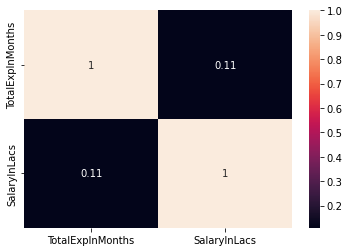

In [28]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)   #producing heatmap

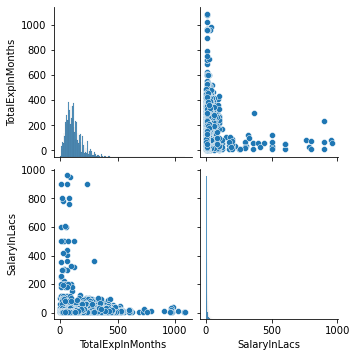

In [29]:
sns.pairplot(df)     #producing pairplots

/Users/mainak01/miniforge3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalExpInMonths', ylabel='Density'>

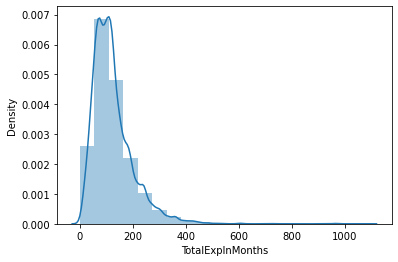

In [30]:
sns.distplot(df['TotalExpInMonths'], bins = 20)      #Seaborn displot of Experience representing overall distribution of continuous data variables

/Users/mainak01/miniforge3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalaryInLacs', ylabel='Density'>

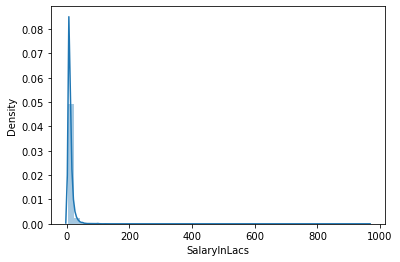

In [31]:
sns.distplot(df['SalaryInLacs'], bins = 50)      #Seaborn displot of Salary

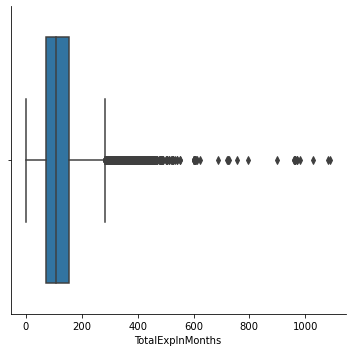

In [32]:
sns.catplot(x = 'TotalExpInMonths', kind = 'box', data=df)      #Boxplot of Experience

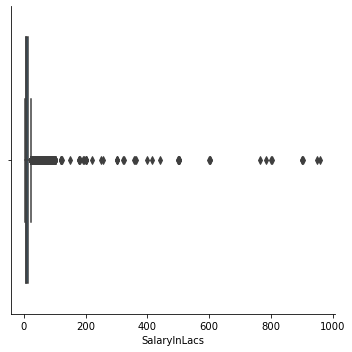

In [33]:
sns.catplot(x = 'SalaryInLacs', kind = 'box', data=df)         #Boxplot of Salary

array([[<AxesSubplot:title={'center':'TotalExpInMonths'}>]], dtype=object)

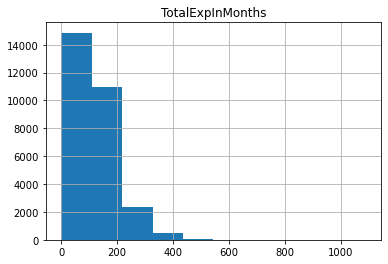

In [34]:
df.hist('TotalExpInMonths')                       #Histogram of Experience

array([[<AxesSubplot:title={'center':'SalaryInLacs'}>]], dtype=object)

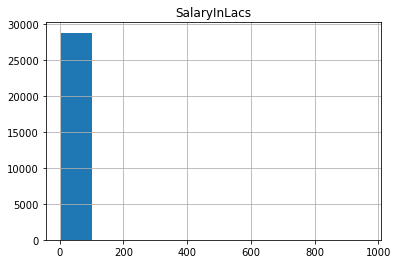

In [35]:
df.hist('SalaryInLacs')                               #Histogram of Salary

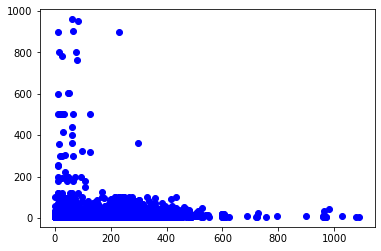

In [36]:
plt.scatter( df['TotalExpInMonths'], df['SalaryInLacs'], color = 'blue')     #Scatter Plot
plt.show()

## Machine Learning : K-Means Clustering

In [37]:
from sklearn.cluster import KMeans                    #importing KMeans package

#### Elbow Technique

In [38]:
#Using this technique to determine the number of clusters
sse = []           #squared sum of errors

k_rng = range(1,10)       #range of number of clusters
for k in k_rng:
    km = KMeans(n_clusters=k)      # k = number of clusters
    km.fit(df[['TotalExpInMonths','SalaryInLacs']])
    sse.append(km.inertia_)

In [39]:
sse       #Values of squared sum of errors

[184691277.26295266,
 80611222.40421881,
 52201521.74799589,
 37893896.42750044,
 28614869.24658031,
 21559747.443682477,
 16546827.426915655,
 13402807.766859235,
 11200251.587529074]

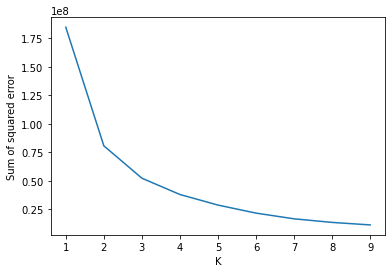

In [40]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [41]:
# So we can see from the above plot that the number of suggested K Clusters are 2, according to the Elbow method

In [42]:
KM = KMeans(n_clusters=2)  #defining two clusters
KM

KMeans(n_clusters=2)

In [43]:
y_predicted = KM.fit_predict(df[['TotalExpInMonths','SalaryInLacs']])     #fit and predict of KMeans
y_predicted                

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [44]:
df['Cluster']=y_predicted               #putting in the dataframe of column 'Cluster'
df

/var/folders/sn/t2zp7pms1pgbzh8ymnmccf100000gn/T/ipykernel_2636/928614140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=y_predicted               #putting in the dataframe of column 'Cluster'


,TotalExpInMonths,SalaryInLacs,Cluster
0,25.0,6.71,0
1,69.0,5.00,0
2,52.0,84.00,0
3,95.0,7.00,0
4,80.0,8.05,0
...,...,...,...
28842,156.0,10.09,0
28843,132.0,7.00,0
28844,23.0,5.22,0
28845,68.0,5.05,0


In [45]:
KM.cluster_centers_                #centroid points of two clusters

array([[ 90.81958648,  10.1825307 ],
       [234.81837905,  16.5986084 ]])

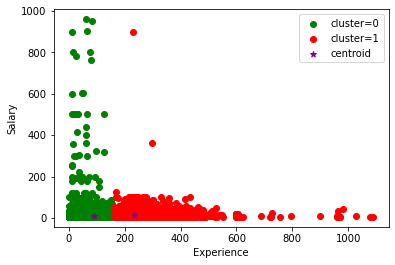

In [46]:
df0 = df[df.Cluster==0]           #creating dataframe of cluster=0
df1 = df[df.Cluster==1]           #creating dataframe of cluster=1
plt.scatter(df0.TotalExpInMonths, df0['SalaryInLacs'], color='green', label='cluster=0' )
plt.scatter(df1.TotalExpInMonths, df1['SalaryInLacs'], color='red', label='cluster=1' )
plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], color='purple',marker='*',label='centroid')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

In [47]:
df0            

,TotalExpInMonths,SalaryInLacs,Cluster
0,25.0,6.71,0
1,69.0,5.00,0
2,52.0,84.00,0
3,95.0,7.00,0
4,80.0,8.05,0
...,...,...,...
28842,156.0,10.09,0
28843,132.0,7.00,0
28844,23.0,5.22,0
28845,68.0,5.05,0


In [48]:
df1          

,TotalExpInMonths,SalaryInLacs,Cluster
5,242.0,16.0,1
10,163.0,10.5,1
13,189.0,7.5,1
16,286.0,12.0,1
26,228.0,6.0,1
...,...,...,...
28823,211.0,24.0,1
28824,360.0,24.0,1
28825,295.0,8.0,1
28831,192.0,20.0,1


In [49]:
#scaling the data points within clusters
scaler = MinMaxScaler()           
scaler.fit(df[['SalaryInLacs']])
df[['SalaryInLacs']] = scaler.transform(df[['SalaryInLacs']])
scaler.fit(df[['TotalExpInMonths']])
df[['TotalExpInMonths']] = scaler.transform(df[['TotalExpInMonths']])
df

/Users/mainak01/miniforge3/envs/ml/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/mainak01/miniforge3/envs/ml/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,TotalExpInMonths,SalaryInLacs,Cluster
0,0.022936,0.001791,0
1,0.063303,0.000000,0
2,0.047706,0.082723,0
3,0.087156,0.002094,0
4,0.073394,0.003194,0
...,...,...,...
28842,0.143119,0.005330,0
28843,0.121101,0.002094,0
28844,0.021101,0.000230,0
28845,0.062385,0.000052,0


In [50]:
#processing the clustering model again
KM = KMeans(n_clusters=2)
y_predicted = KM.fit_predict(df[['TotalExpInMonths','SalaryInLacs']])
y_predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [51]:
df['Cluster']=y_predicted
df

/var/folders/sn/t2zp7pms1pgbzh8ymnmccf100000gn/T/ipykernel_2636/3617102637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=y_predicted


,TotalExpInMonths,SalaryInLacs,Cluster
0,0.022936,0.001791,1
1,0.063303,0.000000,1
2,0.047706,0.082723,1
3,0.087156,0.002094,1
4,0.073394,0.003194,1
...,...,...,...
28842,0.143119,0.005330,1
28843,0.121101,0.002094,1
28844,0.021101,0.000230,1
28845,0.062385,0.000052,1


In [52]:
KM.cluster_centers_         #centroid points of scaled data points

array([[0.21539866, 0.01215221],
       [0.08331197, 0.00542379]])

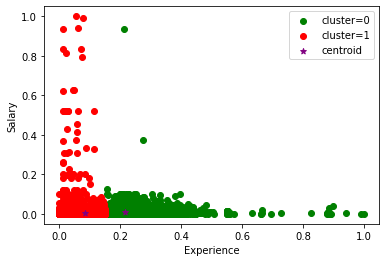

In [53]:
df0 = df[df.Cluster==0]
df1 = df[df.Cluster==1]
plt.scatter(df0.TotalExpInMonths, df0['SalaryInLacs'], color='green', label='cluster=0' )
plt.scatter(df1.TotalExpInMonths, df1['SalaryInLacs'], color='red', label='cluster=1' )
plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], color='purple',marker='*',label='centroid')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

In [54]:
df0             #dataframe of cluster=0

,TotalExpInMonths,SalaryInLacs,Cluster
5,0.222018,0.011518,0
10,0.149541,0.005759,0
13,0.173394,0.002618,0
16,0.262385,0.007330,0
26,0.209174,0.001047,0
...,...,...,...
28823,0.193578,0.019895,0
28824,0.330275,0.019895,0
28825,0.270642,0.003141,0
28831,0.176147,0.015707,0


In [55]:
df1             #dataframe of cluster=1

,TotalExpInMonths,SalaryInLacs,Cluster
0,0.022936,0.001791,1
1,0.063303,0.000000,1
2,0.047706,0.082723,1
3,0.087156,0.002094,1
4,0.073394,0.003194,1
...,...,...,...
28842,0.143119,0.005330,1
28843,0.121101,0.002094,1
28844,0.021101,0.000230,1
28845,0.062385,0.000052,1


In [56]:
df = pd.concat([df0, df1])

In [57]:
df.to_csv('./result.csv',index=False)